# ARIMA

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('life_all.csv')
df = df.set_index('구분1')
df.head()

,1996 년,1997 년,1998 년,1999 년,2000 년,2001 년,2002 년,2003 년,2004 년,2005 년,...,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020년,2021년
구분1,,,,,,,,,,,,,,,,,,,,,
강원,59.0,37.9,40.9,63.0,66.0,91.5,122.1,102.0,123.1,126.0,...,169.7,153.5,204.1,161.7,137.3,162.7,196.3,264.7,104507.8,114571.8
경기,579.0,638.3,636.8,594.0,565.6,573.9,710.3,757.8,745.7,736.7,...,816.8,803.8,842.9,847.3,1017.4,1129.9,1301.5,1572.0,674379.0,789086.5
경남,173.0,116.5,154.1,168.7,179.1,229.7,261.2,263.0,279.5,301.8,...,374.4,310.2,360.9,307.6,336.4,331.2,335.0,409.1,160810.0,181060.0
경북,59.0,72.7,84.4,112.5,114.3,103.9,111.9,149.8,194.6,208.7,...,181.1,206.9,185.6,216.1,280.5,271.0,318.6,320.6,146123.6,147046.8
광주,42.0,49.5,52.4,58.2,63.6,52.4,129.8,115.8,134.3,134.0,...,124.1,133.4,128.9,141.6,138.5,119.8,135.3,129.6,51582.7,73882.0


##  전처리

In [5]:
df['2020 년'] = df['2020년'].apply(lambda x: x / 365)
df['2021 년'] = df['2021년'].apply(lambda x: x / 365)

In [6]:
df.index.name = '지역'
df.drop(['2020년','2021년'], axis = 1, inplace = True)

#### Transpose 및 to_datetime

In [7]:
df_t = df.transpose()
df_t.index.name = '년도'

df_t.drop(['세종'], axis = 1, inplace = True ) #데이터 부족 
df_t['울산'] = df_t['울산'].replace(0, np.nan) #측정되지 않는 값

In [8]:
df_t.index = pd.to_datetime(df_t.index, format='%Y 년')
df_t.index = df_t.index.strftime('%Y년')

In [9]:
df_t.head()

지역,강원,경기,경남,경북,광주,대구,대전,부산,서울,울산,인천,전남,전북,제주,충남,충북
년도,,,,,,,,,,,,,,,,
1996년,59.0,579.0,173.0,59.0,42.0,126.0,152.4,260.0,618.0,NaN,100.0,79.0,63.0,19.9,64.0,48.9
1997년,37.9,638.3,116.5,72.7,49.5,131.3,156.5,249.0,599.4,61.8,100.7,76.4,64.7,29.7,79.7,53.8
1998년,40.9,636.8,154.1,84.4,52.4,197.3,126.7,242.5,506.6,52.2,152.9,85.8,64.5,14.9,77.0,73.0
1999년,63.0,594.0,168.7,112.5,58.2,244.5,136.3,290.3,589.2,66.9,145.3,75.0,96.1,22.0,70.9,53.8
2000년,66.0,565.6,179.1,114.3,63.6,261.4,114.9,260.9,652.2,74.3,201.9,73.3,92.5,16.2,77.7,55.1


#  시각화

In [10]:
import matplotlib.pyplot as plt
from matplotlib import rc  ### 한글 깨짐 문제 해결 
rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False  


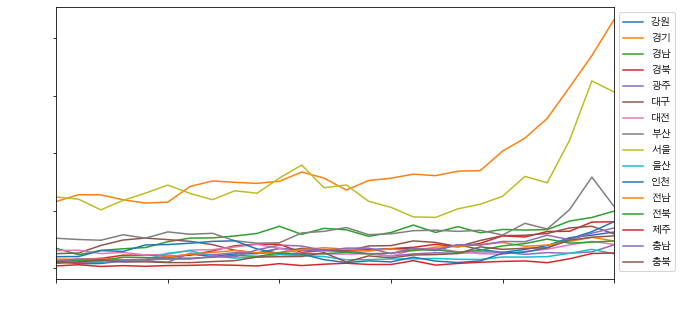

In [11]:

df_t.plot(figsize=(10,5)).autoscale(axis='x',tight=True);

plt.xlabel('연도', color='white')
plt.xticks(color='white')
plt.ylabel('배출량', color='white')
plt.yticks(color='white')



plt.xticks(rotation=0) #레이블 각도
plt.legend(bbox_to_anchor=(1,1)) #라벨 위치 변경 
 
plt.show()

서울 및 경기의 인구 수 상승으로 인하여 현대로 갈수록 급상승하는 추세를 보임. 비정상 시계열 차트임을 확인 할 수 있음.

#### 서울 및 경기

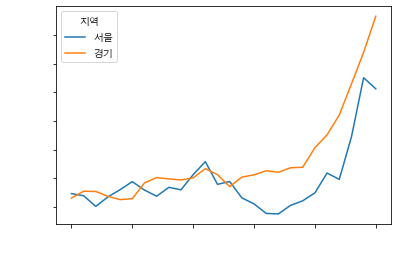

In [12]:
df_t[['서울','경기']].plot() #nouvelle trame de données
plt.xlabel('연도', color='white')
plt.xticks(color='white')
plt.ylabel('배출량', color='white')
plt.yticks(color='white')

plt.show()


경기의 경우 현대로 갈수록 강하게 증가하는 추세를 보이며 서울 또한 마찬가지이다. 데이터의 안정화가 필요함을 확인할 수 있다. 

#### 그 외

서울 및 경기 제외한 시각화 

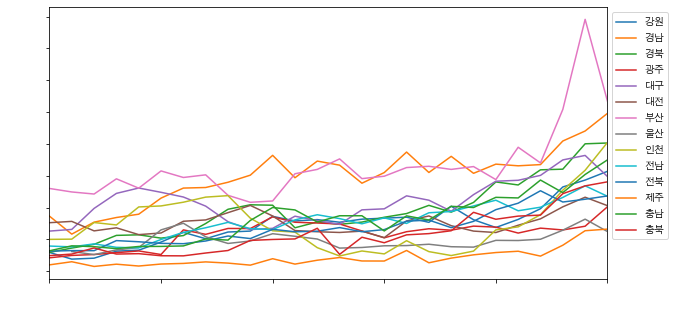

In [13]:
# 제외할 컬럼들
excluded_columns = ['서울', '경기']
# 추출할 컬럼들
selected_columns = [col for col in df_t.columns 
                    if col not in excluded_columns]

# 선택한 컬럼들로 데이터 프레임 생성
selected_df = df_t[selected_columns]

# 선택한 컬럼들 시각화
selected_df.plot(figsize=(10,5)).autoscale(axis='x',tight=True);

# 그래프 출력
plt.xlabel('연도', color='white')
plt.xticks(color='white')
plt.ylabel('배출량', color='white')
plt.yticks(color='white')
plt.legend(bbox_to_anchor=(1,1)) 


plt.show()


서울 및 경기를 제외한 도시들의 경우, 점진적으로 증가하는 추세를 보였고, 부산에서 일시적인 이상치를 발견하였다.  

# 정상성 확인 및 모형 식별 

## 정상성 확인

#### 1차 차분 및 ADF TEST(Augmented Dickey-Fuller Test)

- 귀무가설 Null hypothesis: 증명하고자 하는 가설의 반대되는 가설, 효과와 차이가 없는 가설. 기각에 실패하면 시계열이 비정상성(Non-stationary)임을 의미한다.
- 대립가설 Alternative hypothesis : 증명하고자 하는 가설. 귀무가설이 기각되고 시계열이 정상성(Stationary)임을 의미한다.

In [47]:
#울산(첫번째 값이 결측치이므로 따로 계산)
print('울산 ADF Test')
y = df_t['울산'].iloc[1:]  # 첫 번째 값 제외
y_1diff = df_t['울산'].diff().dropna()[1:]  

# 원 데이터에 대한 ADF 검정 수행
result = adfuller(y)
print(f'원 데이터 ADF Statistic: {result[0]:.3f}')
print(f'원 데이터 p-value: {result[1]:.3f}')
    
    # 1차 차분 데이터에 대한 ADF 검정 수행
result = adfuller(y_1diff)
print(f'1차 차분 ADF Statistic: {result[0]:.3f}')
print(f'1차 차분 p-value: {result[1]:.3f}')
print()


울산 ADF Test
원 데이터 ADF Statistic: -2.182
원 데이터 p-value: 0.213
1차 차분 ADF Statistic: -3.638
1차 차분 p-value: 0.005



In [15]:
from statsmodels.tsa.stattools import adfuller

# 1차 차분의 p-value 값이 0.05 이상 및 이하 컬럼들을 저장할 리스트
not_significant_columns = []
significant_columns = []



# 데이터프레임에 있는 모든 열(지역)에 대해 ADF 검정 수행
for column in df_t.columns:
    y = df_t[column]
    y_1diff = df_t[column].diff().dropna()

    print(f'{column} ADF Test')
    
    # 결측값이 있는 열은 제외하고 ADF 검정 수행
    if y.isnull().sum() > 0:
        print(f'{column} 칼럼에 결측값이 존재하여 분석을 수행할 수 없습니다.')
        print()
        continue
    
    # 원 데이터에 대한 ADF 검정 수행
    result = adfuller(y)
    print(f'원 데이터 ADF Statistic: {result[0]:.3f}')
    print(f'원 데이터 p-value: {result[1]:.3f}')
    
    # 1차 차분 데이터에 대한 ADF 검정 수행
    result = adfuller(y_1diff)
    print(f'1차 차분 ADF Statistic: {result[0]:.3f}')
    print(f'1차 차분 p-value: {result[1]:.3f}')
    print()
    print('---------------------------')
    
    # 1차 차분의 p-value 값이 0.05 이하인 컬럼을 significant_columns 리스트에 추가
    if result[1] >= 0.05:
        not_significant_columns.append(column)
        
    if result[1] < 0.05:
        significant_columns.append(column)

# 1차 차분의 p-value 값이 0.05 이상인 컬럼들 출력
print("1차 차분의 p-value 값이 0.05 이상인 컬럼들:")
print(not_significant_columns)
print()
print("1차 차분의 p-value 값이 0.05 이하인 컬럼들:")
print(significant_columns)

    
 


강원 ADF Test
원 데이터 ADF Statistic: 0.243
원 데이터 p-value: 0.975
1차 차분 ADF Statistic: -5.019
1차 차분 p-value: 0.000

---------------------------
경기 ADF Test
원 데이터 ADF Statistic: 6.129
원 데이터 p-value: 1.000
1차 차분 ADF Statistic: 1.079
1차 차분 p-value: 0.995

---------------------------
경남 ADF Test
원 데이터 ADF Statistic: -0.601
원 데이터 p-value: 0.871
1차 차분 ADF Statistic: -7.396
1차 차분 p-value: 0.000

---------------------------
경북 ADF Test
원 데이터 ADF Statistic: 2.440
원 데이터 p-value: 0.999
1차 차분 ADF Statistic: -5.224
1차 차분 p-value: 0.000

---------------------------
광주 ADF Test
원 데이터 ADF Statistic: -1.417
원 데이터 p-value: 0.574
1차 차분 ADF Statistic: -2.982
1차 차분 p-value: 0.037

---------------------------
대구 ADF Test
원 데이터 ADF Statistic: -1.419
원 데이터 p-value: 0.573
1차 차분 ADF Statistic: -3.531
1차 차분 p-value: 0.007

---------------------------
대전 ADF Test
원 데이터 ADF Statistic: -2.391
원 데이터 p-value: 0.144
1차 차분 ADF Statistic: -3.909
1차 차분 p-value: 0.002

---------------------------
부산 ADF Test
원 데이터 ADF Statistic

1차 차분을 했음에도 정상성 확보 못한 지역들에 한에서 2차 차분 또는 로그변환 진행

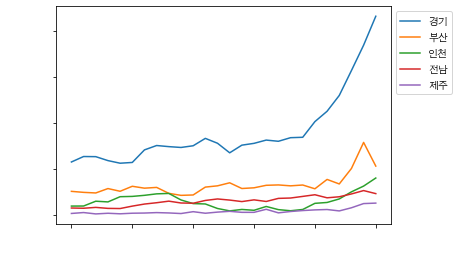

In [16]:
df_t[['경기', '부산', '인천', '전남', '제주']].plot()
plt.xlabel('연도', color='white')
plt.xticks(color='white')
plt.ylabel('배출량', color='white')
plt.yticks(color='white')
plt.legend(bbox_to_anchor=(1,1)) 


#### 2차 차분 

In [17]:
df_t_2diff = df_t[['경기', '부산', '인천', '전남', '제주']]


from statsmodels.tsa.stattools import adfuller

# 1차 차분의 p-value 값이 0.05 이상인 컬럼들을 저장할 리스트
not_significant_columns = []



for column in df_t_2diff.columns:
    y = df_t[column]
    y_1diff = df_t_2diff[column].diff().dropna()
    y_2diff = y_1diff.diff().dropna()
    print(f'{column} ADF Test')
    
    # 결측값이 있는 열은 제외하고 ADF 검정 수행
    if y.isnull().sum() > 0:
        print(f'{column} 칼럼에 결측값이 존재하여 분석을 수행할 수 없습니다.')
        print()
        continue
    
    # 원 데이터에 대한 ADF 검정 수행
    result = adfuller(y)
    print(f'원 데이터 ADF Statistic: {result[0]:.3f}')
    print(f'원 데이터 p-value: {result[1]:.3f}')
    
    # 1차 차분 데이터에 대한 ADF 검정 수행
    result = adfuller(y_1diff)
    print(f'1차 차분 ADF Statistic: {result[0]:.3f}')
    print(f'1차 차분 p-value: {result[1]:.3f}')
    print()
    
     # 2차 차분 데이터에 대한 ADF 검정 수행
    result = adfuller(y_2diff)
    print(f'2차 차분 ADF Statistic: {result[0]:.3f}')
    print(f'2차 차분 p-value: {result[1]:.3f}')
    print()
    print('---------------------------')
    # 1차 차분의 p-value 값이 0.05 이하인 컬럼을 significant_columns 리스트에 추가
    if result[1] >= 0.05:
        not_significant_columns.append(column)

# 2차 차분의 p-value 값이 0.05 이상인 컬럼들 출력
print("1차 차분의 p-value 값이 0.05 이상인 컬럼들:")
print(not_significant_columns)

    
 


경기 ADF Test
원 데이터 ADF Statistic: 6.129
원 데이터 p-value: 1.000
1차 차분 ADF Statistic: 1.079
1차 차분 p-value: 0.995

2차 차분 ADF Statistic: -6.221
2차 차분 p-value: 0.000

---------------------------
부산 ADF Test
원 데이터 ADF Statistic: 1.774
원 데이터 p-value: 0.998
1차 차분 ADF Statistic: -1.689
1차 차분 p-value: 0.437

2차 차분 ADF Statistic: -2.141
2차 차분 p-value: 0.228

---------------------------
인천 ADF Test
원 데이터 ADF Statistic: -0.139
원 데이터 p-value: 0.945
1차 차분 ADF Statistic: -0.508
1차 차분 p-value: 0.890

2차 차분 ADF Statistic: -5.090
2차 차분 p-value: 0.000

---------------------------
전남 ADF Test
원 데이터 ADF Statistic: -0.653
원 데이터 p-value: 0.859
1차 차분 ADF Statistic: -2.234
1차 차분 p-value: 0.194

2차 차분 ADF Statistic: -0.813
2차 차분 p-value: 0.815

---------------------------
제주 ADF Test
원 데이터 ADF Statistic: 0.849
원 데이터 p-value: 0.992
1차 차분 ADF Statistic: 2.109
1차 차분 p-value: 0.999

2차 차분 ADF Statistic: 0.104
2차 차분 p-value: 0.966

---------------------------
1차 차분의 p-value 값이 0.05 이상인 컬럼들:
['부산', '전남', '제주']


2차 차분 결과 경기와 인천이 ADF test 를 통과하였다. 하지만 ['부산', '전남', '제주'] 는 통과하지 못했다. 더이상 차분은 너무 큰 데이터 손실을 초래 하기 때문에, 로그 변환 등으로 다른 방식을 확인해본다.

#### 로그변환

In [18]:
df_t_log = df_t[['부산', '전남', '제주']]

#로그 변환 및 ADF 검정 수행
for column in df_t_log.columns:
    y = df_t_log[column]
    y_log = np.log(y)

    print(f'{column} ADF Test after Log Transformation')
    
    # 로그 변환된 데이터에 대한 ADF 검정 수행
    result = adfuller(y_log)
    print(f'로그 변환된 데이터 ADF Statistic: {result[0]:.3f}')
    print(f'로그 변환된 데이터 p-value: {result[1]:.3f}')
    print()

부산 ADF Test after Log Transformation
로그 변환된 데이터 ADF Statistic: 1.416
로그 변환된 데이터 p-value: 0.997

전남 ADF Test after Log Transformation
로그 변환된 데이터 ADF Statistic: -1.180
로그 변환된 데이터 p-value: 0.682

제주 ADF Test after Log Transformation
로그 변환된 데이터 ADF Statistic: 1.629
로그 변환된 데이터 p-value: 0.998



그럼에도 불구하고 정상성을 확보하지 못했다.

#### Box-cox 변환

In [19]:
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller

df_t_box = df_t[['부산', '전남', '제주']]

for column in df_t_box.columns:
    y = df_t_box[column]
    
    print(f'{column} Box-Cox Transformation and ADF Test')

    # Box-Cox 변환 수행
    transformed_data, lambda_ = boxcox(y)
    
    # 변환된 데이터에 대한 ADF 검정 수행
    result = adfuller(transformed_data)
    
    print(f'Lambda: {lambda_}')
    print(f'Transformed Data ADF Statistic: {result[0]:.3f}')
    print(f'Transformed Data p-value: {result[1]:.3f}')
    print()

부산 Box-Cox Transformation and ADF Test
Lambda: -1.6682841017687517
Transformed Data ADF Statistic: 0.911
Transformed Data p-value: 0.993

전남 Box-Cox Transformation and ADF Test
Lambda: 0.7501061138787818
Transformed Data ADF Statistic: -0.983
Transformed Data p-value: 0.759

제주 Box-Cox Transformation and ADF Test
Lambda: -0.5338003118250155
Transformed Data ADF Statistic: 0.395
Transformed Data p-value: 0.981



그럼에도 불구하고 정상성을 확보하지 못했다.

#### 3차 차분

In [20]:
df_t_3diff = df_t[['부산','전남', '제주']]


from statsmodels.tsa.stattools import adfuller

not_significant_columns=[]


for column in df_t_3diff.columns:
    y = df_t_3diff[column]
    y_1diff = df_t_3diff[column].diff().dropna()
    y_2diff = y_1diff.diff().dropna()
    y_3diff = y_2diff.diff().dropna()
    print(f'{column} ADF Test')
    
    
    # 원 데이터에 대한 ADF 검정 수행
    result = adfuller(y)
    print(f'원 데이터 ADF Statistic: {result[0]:.3f}')
    print(f'원 데이터 p-value: {result[1]:.3f}')
    
    # 1차 차분 데이터에 대한 ADF 검정 수행
    result = adfuller(y_1diff)
    print(f'1차 차분 ADF Statistic: {result[0]:.3f}')
    print(f'1차 차분 p-value: {result[1]:.3f}')
    print()
    
     # 2차 차분 데이터에 대한 ADF 검정 수행
    result = adfuller(y_2diff)
    print(f'2차 차분 ADF Statistic: {result[0]:.3f}')
    print(f'2차 차분 p-value: {result[1]:.3f}')
    print()
    
      # 3차 차분 데이터에 대한 ADF 검정 수행
    result = adfuller(y_3diff)
    print(f'3차 차분 ADF Statistic: {result[0]:.3f}')
    print(f'3차 차분 p-value: {result[1]:.3f}')
    print()
    print('---------------------------')
    # 1차 차분의 p-value 값이 0.05 이하인 컬럼을 significant_columns 리스트에 추가
    if result[1] >= 0.05:
        not_significant_columns.append(column)

# 1차 차분의 p-value 값이 0.05 이상인 컬럼들 출력
print("3차 차분의 p-value 값이 0.05 이상인 컬럼들:")
print(not_significant_columns)

    
 


부산 ADF Test
원 데이터 ADF Statistic: 1.774
원 데이터 p-value: 0.998
1차 차분 ADF Statistic: -1.689
1차 차분 p-value: 0.437

2차 차분 ADF Statistic: -2.141
2차 차분 p-value: 0.228

3차 차분 ADF Statistic: -1.710
3차 차분 p-value: 0.426

---------------------------
전남 ADF Test
원 데이터 ADF Statistic: -0.653
원 데이터 p-value: 0.859
1차 차분 ADF Statistic: -2.234
1차 차분 p-value: 0.194

2차 차분 ADF Statistic: -0.813
2차 차분 p-value: 0.815

3차 차분 ADF Statistic: -4.467
3차 차분 p-value: 0.000

---------------------------
제주 ADF Test
원 데이터 ADF Statistic: 0.849
원 데이터 p-value: 0.992
1차 차분 ADF Statistic: 2.109
1차 차분 p-value: 0.999

2차 차분 ADF Statistic: 0.104
2차 차분 p-value: 0.966

3차 차분 ADF Statistic: -3.715
3차 차분 p-value: 0.004

---------------------------
3차 차분의 p-value 값이 0.05 이상인 컬럼들:
['부산']


### 결론

차분을 두 번 이상 진행하면 본 데이터가 충분히 많지 않기 때문에 데이터의 손실이 크고, 예측이 정상적으로 진행되지 않을 것으로 판단하여 본 예측에서는 1차 차분 이내에서 정상성을 확보한 지역들에 한해서 분석을 진행한다.


## 모형 식별

In [31]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from scipy.stats import normaltest
from statsmodels.stats.diagnostic import acorr_ljungbox


팀원들과 역할 분담 하에서, 여러 모델 중 ARIMA 모델로 분석을 진행한다. 

ARIMA모델은 정상성을 전제로 하는 모델이므로 정상성을 확인해야 한다. 추세가 있다는 것은 평균이 시간에 따라 변한다는 것이므로 정상 시계열로 볼 수 없다. 따라서 차분을 진행하였고 1차 차분결과 ADF Test p-value 값이 0.05 보다 작게 나와서 정상성을 확보한 지역에 한에서 분석을 수행한다.

cf) 정상성 조건
- 평균이 일정할 것
- 분산이 일정할 것
- 공분산이 시점에 의존하지 않을 것 = 시차에만 의존할 것

cf) ARIMA 모수 설정


ARIMA의 모수는 크게 3가지가 있다. AR모형의 Lag을 의미하는 p, MA모형의 Lag을 의미하는 q, 차분(Diffrence)횟수를 의미하는 d 가 그것이다. 보통은 p, d, q의 순서로 쓴다.
통상적으로 p + q < 2, p * q = 0 인 값들을 많이 사용한다.

여기서 p * q = 0 이라 하면, 두 값중 하나는 0이라는 이야기이다. ARIMA는 AR모형과 MA모형을 하나로 합쳤다면서 둘 중 하나의 모수가 0인건 또 무슨소리? 라고 할지 모르겠지만, 실제로 대부분의 시계열 자료에서는 하나의 경향만을 강하게 띄기 때문에, 이렇게 사용하는것이 더 잘 맞는다고 한다.



예측 대상 지역은 다음과 같다. 해당 지역들은 1차 차분을 하여 정상성을 확보한 데이터 기준으로 선정하였다.


['강원', '울산', '경남', '경북', '광주', '대구', '대전', '서울', '전북', '충남', '충북']

['경기', '부산', '인천', '전남', '제주']는 정상성 확인 실패로 ARMA 모델에서 제외한다.

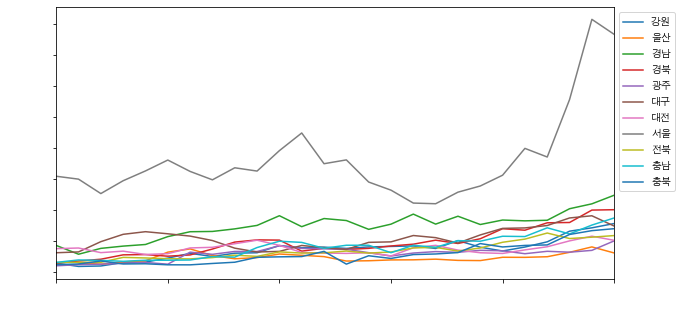

In [32]:
#분석 예정 지역
df = df_t[['강원', '울산', '경남', '경북', '광주', '대구', '대전', '서울', '전북', '충남', '충북']]


df.plot(figsize=(10,5)).autoscale(axis='x',tight=True);

plt.xlabel('연도', color='white')
plt.xticks(color='white')
plt.ylabel('배출량', color='white')
plt.yticks(color='white')



plt.xticks(rotation=0) #레이블 각도
plt.legend(bbox_to_anchor=(1,1)) #라벨 위치 변경 
 
plt.show()

In [34]:
#1차 차분적용
df_1diff = df.diff().dropna()

for column in df_1diff.columns:
    y_diff = df_1diff[column]


1차 차분 지역 plot 

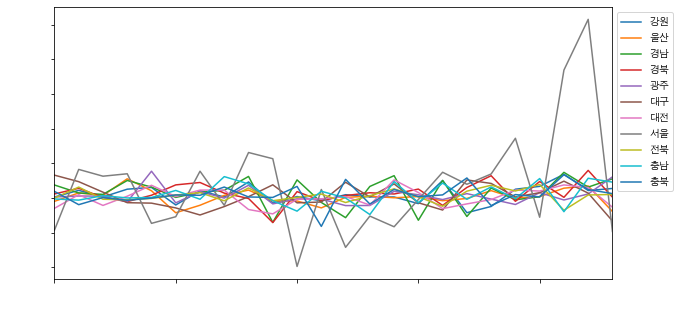

In [33]:

df_1diff.plot(figsize=(10,5)).autoscale(axis='x',tight=True);

plt.xlabel('연도', color='white')
plt.xticks(color='white')
plt.ylabel('배출량', color='white')
plt.yticks(color='white')



plt.xticks(rotation=0) #레이블 각도
plt.legend(bbox_to_anchor=(1,1)) #라벨 위치 변경 
 
plt.show()

# 모수 추정

 ACF와 PACF를 동시에 고려하여 ARIMA 모델의 p와 q를 결정하는데 그 방법은 다음과 같다.
 그 외 Auto ARIMA 함수를 사용하여 최적의 모수를 추정할 계획이다.
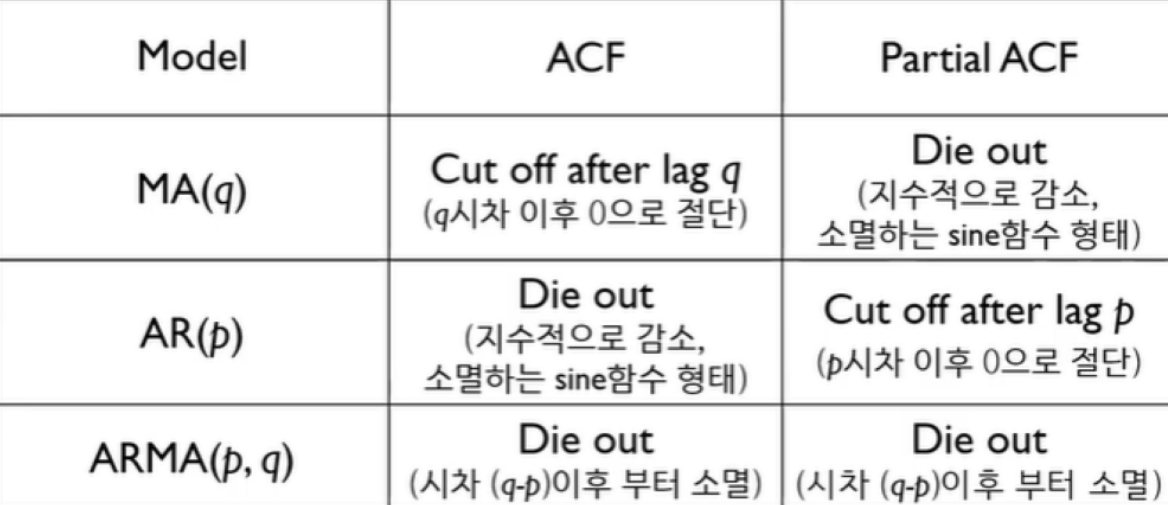

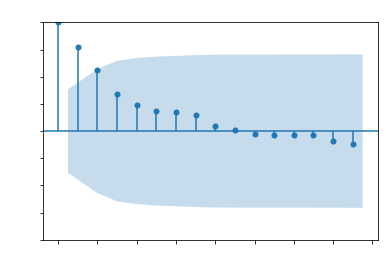

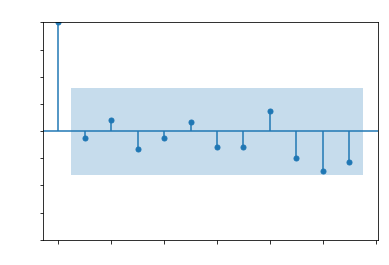

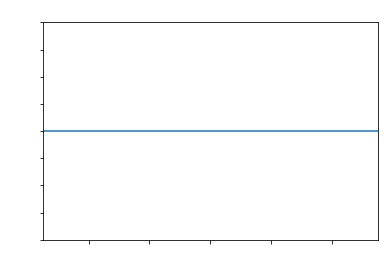

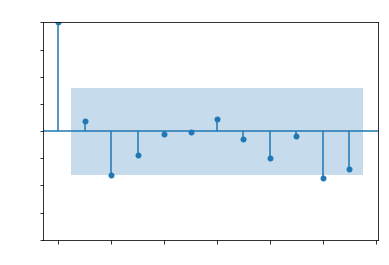

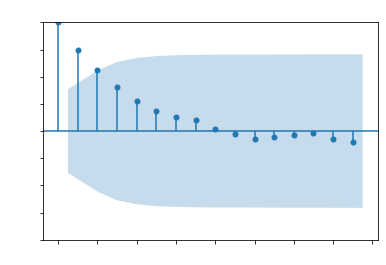

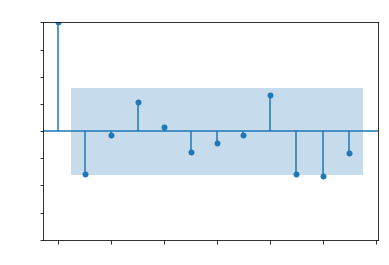

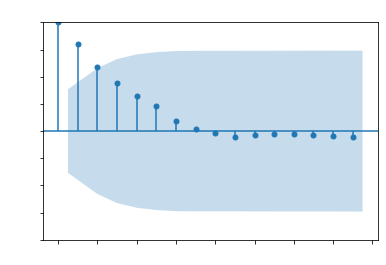

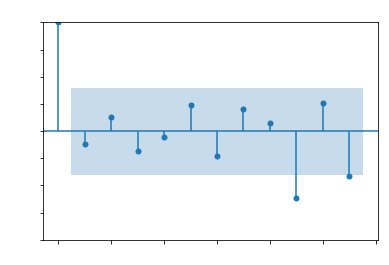

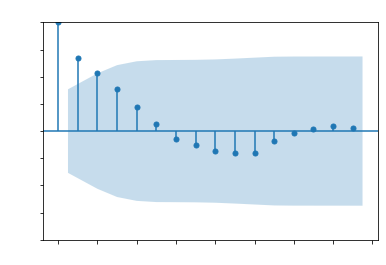

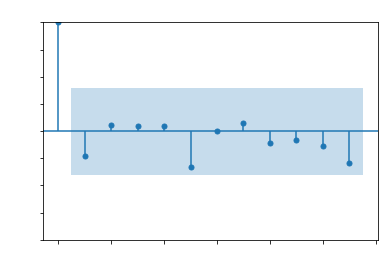

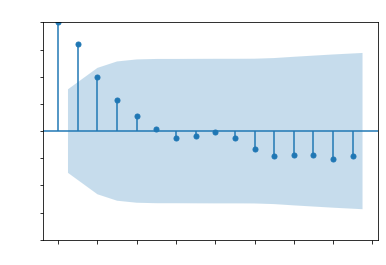

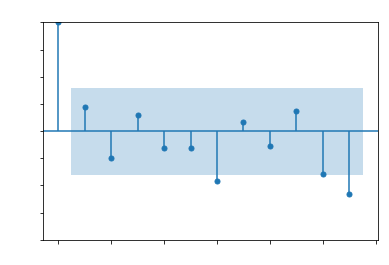

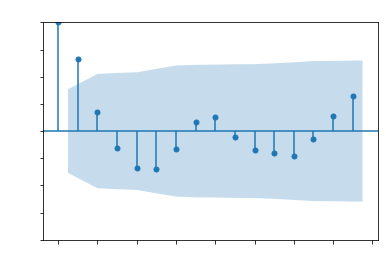

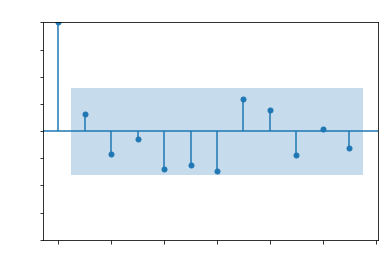

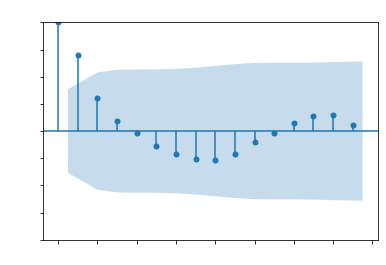

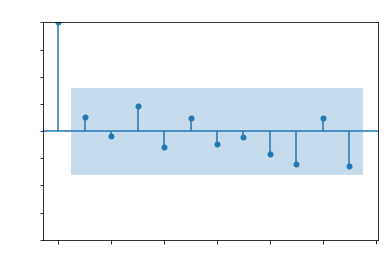

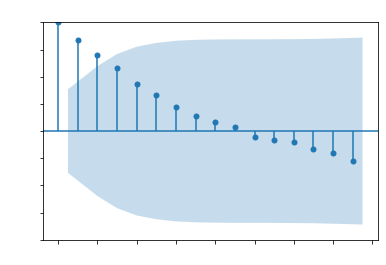

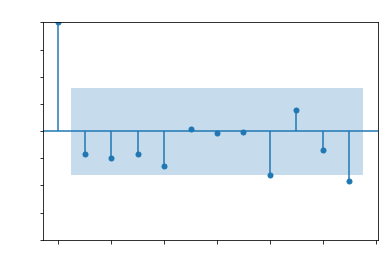

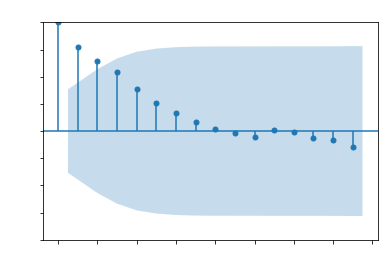

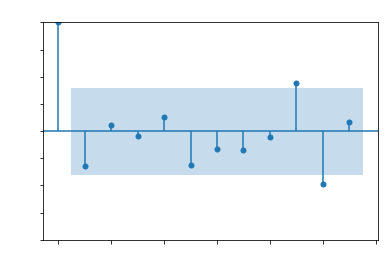

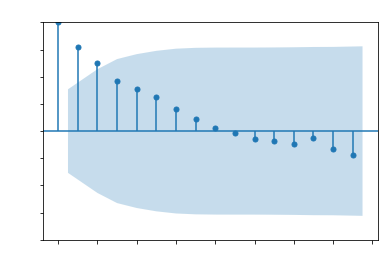

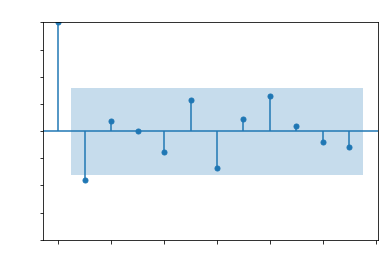

In [35]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for column in df.columns:
    plot_acf(df[column])
    plt.title(f'ACF Plot - {column}', color='white')
    plt.xticks(color='white')
    plt.yticks(color='white')

    
    plot_pacf(df_1diff[column], lags=11)  
    plt.title(f'PACF Plot - {column}',color='white')
    plt.xticks(color='white')
    plt.yticks(color='white')


In [48]:
from pmdarima.arima import auto_arima

# 칼럼 리스트

df_auto = df.drop(['울산'], axis=1)

for column in df_auto:
    # column에 해당하는 데이터 준비
    data = df_auto[column]

    # AutoARIMA 모델 피팅
    model = auto_arima(data, start_p=0, d=1, start_q=0,
                       max_p=3, max_d=3, max_q=3,
                       seasonal=False, trace=True)

    # 최적 매개변수 확인
    print(f"Column: {column}")
    print(model.summary())
    print('---------------------------------------------------')
    print('---------------------------------------------------')
    print()

    
#울산     
data = df['울산'].iloc[1:]

    # AutoARIMA 모델 피팅
model = auto_arima(data, start_p=0, d=1, start_q=0,
                       max_p=3, max_d=3, max_q=3,
                       seasonal=False, trace=True)

print('Column: 울산')
print(model.summary())
print()


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=236.881, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=238.827, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=238.833, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=238.589, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=240.579, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.099 seconds
Column: 강원
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   26
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -116.441
Date:                Sat, 27 May 2023   AIC                            236.881
Time:                        22:07:15   BIC                            239.319
Sample:                             0   HQIC                           237.558
                                 - 26                                 

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=249.085, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=248.596, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=250.308, Time=0.04 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=247.201, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=246.976, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=247.453, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=250.057, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=248.626, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.273 seconds
Column: 대구
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   26
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -121.488
Date:                Sat, 27 May 

 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=246.500, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=246.498, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=248.291, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=247.732, Time=0.01 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.166 seconds
Column: 충남
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   26
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -119.254
Date:                Sat, 27 May 2023   AIC                            244.508
Time:                        22:07:16   BIC                            248.165
Sample:                             0   HQIC                           245.523
                                 - 26                                         
Covariance Type:                  opg                                         
                 coe

분석결과
- 강원 ARIMA(0,1,0)
- 경남 ARIMA(1,1,0)
- 경북 ARIMA(0,1,0)
- 광주 ARIMA(0,1,0)
- 대구 ARIMA(0,1,1)
- 대전 ARIMA(0,1,0)
- 서울 ARIMA(0,1,0)
- 전북 ARIMA(0,1,1)
- 충남 ARIMA(1,1,0)
- 충북 ARIMA(1,1,0)
- 울산 ARIMA(0,1,0)


# 예측 및 평가

## 지역별 예측 및 평가

### 강원

/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Mean Squared Error (MSE): 8516.128254181522
Mean Absolute Error (MAE): 73.30301369863014
Root Mean Squared Error (RMSE): 92.28287086009799


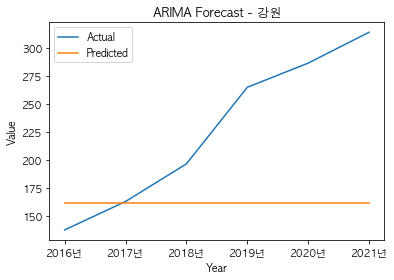

In [36]:
# train, test 데이터
train_data = df['강원'].loc['1996':'2016']
test_data = df['강원'].loc['2016':'2022']

# ARIMA 모수 추정
model = ARIMA(train_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast the values for the test period
forecast = model_fit.forecast(steps=len(test_data))
#인덱스 수정
forecast.index = test_data.index



# Evaluation
mse = np.mean((forecast - test_data)**2)
mae = np.mean(np.abs(forecast - test_data))
rmse = np.sqrt(mse)

# Print evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

# Plot the actual vs predicted values
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, forecast, label='Predicted')
plt.title('ARIMA Forecast - 강원')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

### 경남

Mean Squared Error (MSE): 8481.970959036147
Mean Absolute Error (MAE): 66.75976458787437
Root Mean Squared Error (RMSE): 92.09761646772488


/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


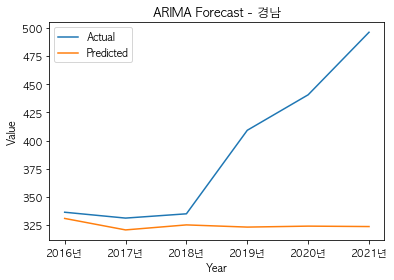

In [37]:
# test,train 데이터
train_data = df['경남'].loc['1996':'2016']
test_data = df['경남'].loc['2016':'2022']

#ARIMA 모수추정값 적용 
model = ARIMA(train_data, order=(1, 1, 0))
model_fit = model.fit()

# Forecast the values for the test period
forecast = model_fit.forecast(steps=len(test_data))
#인덱스 수정
forecast.index = test_data.index


# Evaluation
mse = np.mean((forecast - test_data)**2)
mae = np.mean(np.abs(forecast - test_data))
rmse = np.sqrt(mse)

# Print evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

# Plot the actual vs predicted values
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, forecast, label='Predicted')
plt.title('ARIMA Forecast - 경남')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

### 경북

Mean Squared Error (MSE): 16235.668031838373
Mean Absolute Error (MAE): 116.21776255707765
Root Mean Squared Error (RMSE): 127.4192608353948


/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


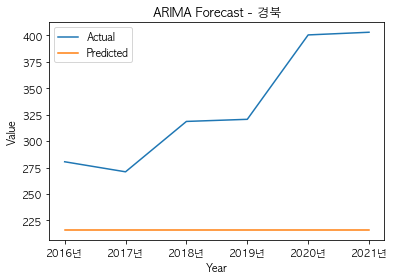

In [38]:
# train, test 데이터
train_data = df['경북'].loc['1996':'2016']
test_data = df['경북'].loc['2016':'2022']

# ARIMA 모수 추정
model = ARIMA(train_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast the values for the test period
forecast = model_fit.forecast(steps=len(test_data))
#인덱스 수정
forecast.index = test_data.index



# Evaluation
mse = np.mean((forecast - test_data)**2)
mae = np.mean(np.abs(forecast - test_data))
rmse = np.sqrt(mse)

# Print evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

# Plot the actual vs predicted values
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, forecast, label='Predicted')
plt.title('ARIMA Forecast - 경북')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

### 광주

Mean Squared Error (MSE): 727.8760332645273
Mean Absolute Error (MAE): 17.382328767123287
Root Mean Squared Error (RMSE): 26.979177772210317


/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


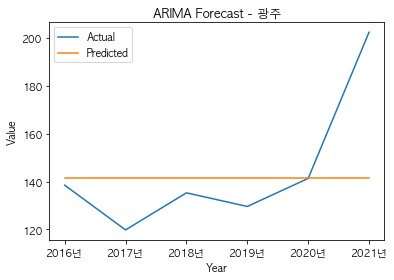

In [39]:
# train, test 데이터
train_data = df['광주'].loc['1996':'2016']
test_data = df['광주'].loc['2016':'2022']

# ARIMA 모수 추정
model = ARIMA(train_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast the values for the test period
forecast = model_fit.forecast(steps=len(test_data))
#인덱스 수정
forecast.index = test_data.index



# Evaluation
mse = np.mean((forecast - test_data)**2)
mae = np.mean(np.abs(forecast - test_data))
rmse = np.sqrt(mse)

# Print evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

# Plot the actual vs predicted values
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, forecast, label='Predicted')
plt.title('ARIMA Forecast - 광주')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

### 대구

Mean Squared Error (MSE): 6299.8468772377555
Mean Absolute Error (MAE): 72.83232876712329
Root Mean Squared Error (RMSE): 79.37157474334093


/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


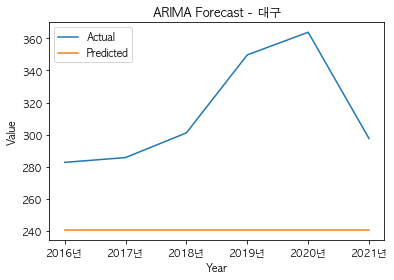

In [40]:
# train, test 데이터
train_data = df['대구'].loc['1996':'2016']
test_data = df['대구'].loc['2016':'2022']

# ARIMA 모수 추정
model = ARIMA(train_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast the values for the test period
forecast = model_fit.forecast(steps=len(test_data))
#인덱스 수정
forecast.index = test_data.index



# Evaluation
mse = np.mean((forecast - test_data)**2)
mae = np.mean(np.abs(forecast - test_data))
rmse = np.sqrt(mse)

# Print evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

# Plot the actual vs predicted values
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, forecast, label='Predicted')
plt.title('ARIMA Forecast - 대구')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

### 대전

Mean Squared Error (MSE): 4231.90911860887
Mean Absolute Error (MAE): 54.02118721461187
Root Mean Squared Error (RMSE): 65.05312535619538


/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


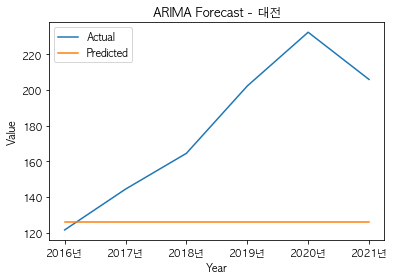

In [41]:
# train, test 데이터
train_data = df['대전'].loc['1996':'2016']
test_data = df['대전'].loc['2016':'2022']

# ARIMA 모수 추정
model = ARIMA(train_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast the values for the test period
forecast = model_fit.forecast(steps=len(test_data))
#인덱스 수정
forecast.index = test_data.index



# Evaluation
mse = np.mean((forecast - test_data)**2)
mae = np.mean(np.abs(forecast - test_data))
rmse = np.sqrt(mse)

# Print evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

# Plot the actual vs predicted values
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, forecast, label='Predicted')
plt.title('ARIMA Forecast - 대전')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

### 서울

Mean Squared Error (MSE): 417705.7298735599
Mean Absolute Error (MAE): 516.7068949771691
Root Mean Squared Error (RMSE): 646.3015781147063


/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


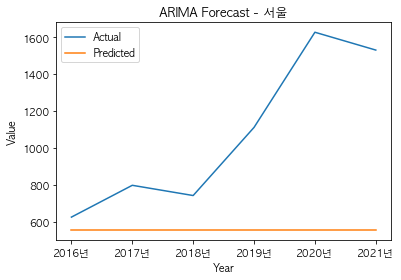

In [42]:
# train, test 데이터
train_data = df['서울'].loc['1996':'2016']
test_data = df['서울'].loc['2016':'2022']

# ARIMA 모수 추정
model = ARIMA(train_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast the values for the test period
forecast = model_fit.forecast(steps=len(test_data))
#인덱스 수정
forecast.index = test_data.index



# Evaluation
mse = np.mean((forecast - test_data)**2)
mae = np.mean(np.abs(forecast - test_data))
rmse = np.sqrt(mse)

# Print evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

# Plot the actual vs predicted values
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, forecast, label='Predicted')
plt.title('ARIMA Forecast - 서울')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

### 전북

Mean Squared Error (MSE): 5333.340490431986
Mean Absolute Error (MAE): 70.62437097495058
Root Mean Squared Error (RMSE): 73.02972333531044


/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


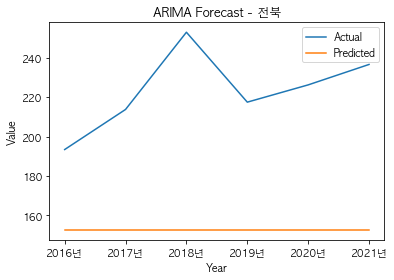

In [43]:
# train, test 데이터
train_data = df['전북'].loc['1996':'2016']
test_data = df['전북'].loc['2016':'2022']

# ARIMA 모수 추정
model = ARIMA(train_data, order=(0, 1, 1))
model_fit = model.fit()

# Forecast the values for the test period
forecast = model_fit.forecast(steps=len(test_data))
#인덱스 수정
forecast.index = test_data.index



# Evaluation
mse = np.mean((forecast - test_data)**2)
mae = np.mean(np.abs(forecast - test_data))
rmse = np.sqrt(mse)

# Print evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

# Plot the actual vs predicted values
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, forecast, label='Predicted')
plt.title('ARIMA Forecast - 전북')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

### 충남

Mean Squared Error (MSE): 7389.966687425891
Mean Absolute Error (MAE): 74.30941436817234
Root Mean Squared Error (RMSE): 85.96491544476672


/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


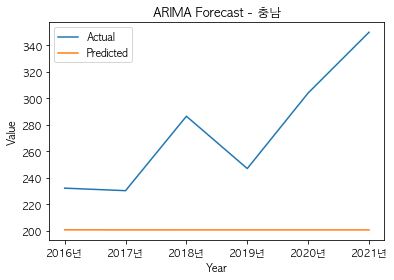

In [44]:
# train, test 데이터
train_data = df['충남'].loc['1996':'2016']
test_data = df['충남'].loc['2016':'2022']

# ARIMA 모수 추정
model = ARIMA(train_data, order=(1, 1, 0))
model_fit = model.fit()

# Forecast the values for the test period
forecast = model_fit.forecast(steps=len(test_data))
#인덱스 수정
forecast.index = test_data.index



# Evaluation
mse = np.mean((forecast - test_data)**2)
mae = np.mean(np.abs(forecast - test_data))
rmse = np.sqrt(mse)

# Print evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

# Plot the actual vs predicted values
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, forecast, label='Predicted')
plt.title('ARIMA Forecast - 충남')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

### 충북

Mean Squared Error (MSE): 5053.2307958734555
Mean Absolute Error (MAE): 53.613710320734924
Root Mean Squared Error (RMSE): 71.08608018362987


/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


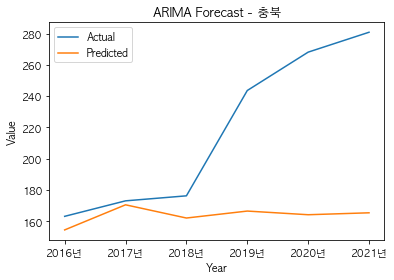

In [45]:
# train, test 데이터
train_data = df['충북'].loc['1996':'2016']
test_data = df['충북'].loc['2016':'2022']

# ARIMA 모수 추정
model = ARIMA(train_data, order=(1, 1, 0))
model_fit = model.fit()

# Forecast the values for the test period
forecast = model_fit.forecast(steps=len(test_data))
#인덱스 수정
forecast.index = test_data.index



# Evaluation
mse = np.mean((forecast - test_data)**2)
mae = np.mean(np.abs(forecast - test_data))
rmse = np.sqrt(mse)

# Print evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

# Plot the actual vs predicted values
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, forecast, label='Predicted')
plt.title('ARIMA Forecast - 충북')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

### 울산

Mean Squared Error (MSE): 7389.966687425891
Mean Absolute Error (MAE): 74.30941436817234
Root Mean Squared Error (RMSE): 85.96491544476672


/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/donggunhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


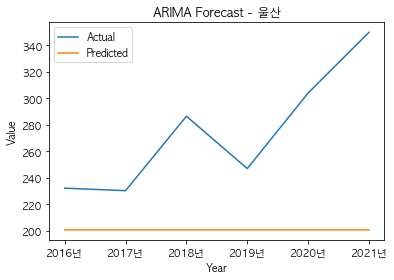

In [46]:
# train, test 데이터
train_data = df['충남'].loc['1996':'2016']
test_data = df['충남'].loc['2016':'2022']

# ARIMA 모수 추정
model = ARIMA(train_data, order=(1, 1, 0))
model_fit = model.fit()

# Forecast the values for the test period
forecast = model_fit.forecast(steps=len(test_data))
#인덱스 수정
forecast.index = test_data.index



# Evaluation
mse = np.mean((forecast - test_data)**2)
mae = np.mean(np.abs(forecast - test_data))
rmse = np.sqrt(mse)

# Print evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

# Plot the actual vs predicted values
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, forecast, label='Predicted')
plt.title('ARIMA Forecast - 울산')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()